In [2]:
# Import Libs
# Python package for Mathmatical libs
import math
import calendar
import numpy as np
import pandas as pd

# Python package to read data
import pandas_datareader as web

# Python package for graphical display
import matplotlib.pyplot as plt
%matplotlib inline

# Python package for Data Processing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Python package to read data
import pandas_datareader as web



In [3]:
# Fetch Apple Stock quote from Yahoo for last 10 Years

apple_stock = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end = '2021-2-25')
apple_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,290.000000,290.000000,290.000000,290.000000,2.900000e+02,290.000000
mean,101.466130,98.606888,100.060276,100.097758,1.509478e+08,99.693670
std,24.230887,23.674329,24.152399,23.934512,6.825816e+07,24.078434
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,79.607498,77.846249,78.598124,78.743124,1.038144e+08,78.100435
50%,99.602501,96.672501,99.081249,98.041248,1.338080e+08,97.550476
75%,122.567501,118.749998,120.287500,120.837498,1.771206e+08,120.449390
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


In [5]:
# Apple Stock Data
apple_stock.shape
apple_stock.head(8)
apple_stock.reset_index(inplace=True)

apple_stock=apple_stock[['Date','High','Open','Low','Close','Volume','Adj Close']]

apple_stock['Date'] = pd.to_datetime(apple_stock.Date,format='%Y-%m-%d')

df=apple_stock
df.describe

<bound method NDFrame.describe of           Date        High        Open         Low       Close       Volume  \
0   2020-01-02   75.150002   74.059998   73.797501   75.087502  135480400.0   
1   2020-01-03   75.144997   74.287498   74.125000   74.357498  146322800.0   
2   2020-01-06   74.989998   73.447502   73.187500   74.949997  118387200.0   
3   2020-01-07   75.224998   74.959999   74.370003   74.597504  108872000.0   
4   2020-01-08   76.110001   74.290001   74.290001   75.797501  132079200.0   
..         ...         ...         ...         ...         ...          ...   
285 2021-02-19  130.710007  130.240005  128.800003  129.869995   87525900.0   
286 2021-02-22  129.720001  128.009995  125.599998  126.000000  103607600.0   
287 2021-02-23  126.709999  123.760002  118.389999  125.860001  157859100.0   
288 2021-02-24  125.559998  124.940002  122.230003  125.349998  110691500.0   
289 2021-02-25  126.459999  124.680000  120.540001  120.989998  147306500.0   

      Adj Close  

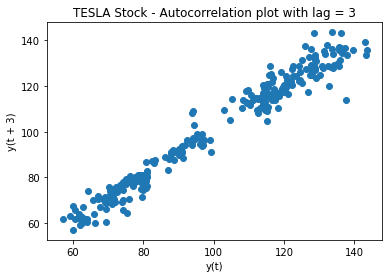

In [6]:
plt.figure()
lag_plot(apple_stock['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

In [ ]:
model = auto_arima()

In [7]:
train_data, test_data = apple_stock[0:int(len(apple_stock)*0.7)], apple_stock[int(len(apple_stock)*0.7):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

F:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 6.483155852763322


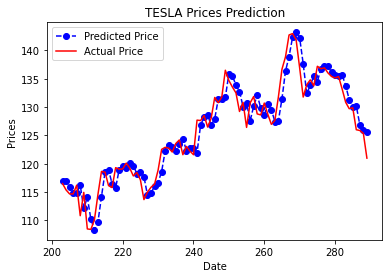

In [8]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()